In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import FunctionTransformer,StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score

In [5]:

df = pd.read_csv("../dataset/output_ua_info.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [22]:
# Convert 'Timestamp' column to datetime format and round to the nearest hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].dt.floor('H')  # Group by hour, change to 'D' for daily trends

# Count occurrences of each attack type per timestamp
attack_counts = df.groupby(['Timestamp', 'Attack Type']).size().reset_index(name='Count')

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the hour from Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Count occurrences of each attack type per hour
attack_counts_by_hour = df.groupby(['Hour', 'Attack Type']).size().reset_index(name='Count')

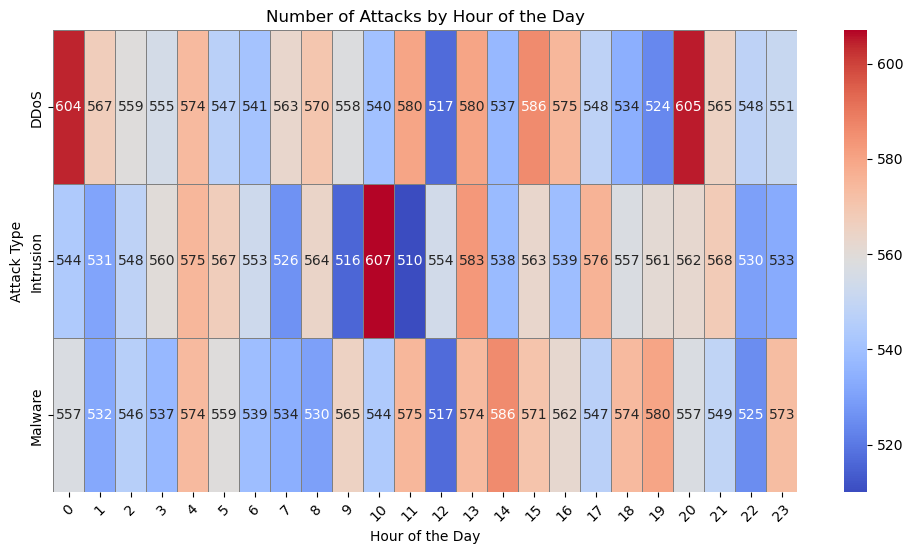

In [23]:
# Pivot the data to get a heatmap-friendly format
pivot_table = attack_counts_by_hour.pivot(index='Attack Type', columns='Hour', values='Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, linecolor="gray", annot=True, fmt=".0f")

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Attack Type")
plt.title("Number of Attacks by Hour of the Day")
plt.xticks(rotation=45)

plt.show()

In [4]:
print(
    f"The dataset contains {df.shape[0]} samples and "
    f"{df.shape[1] -1} columns"
)

The dataset contains 40000 samples and 30 columns


array([[<Axes: title={'center': 'Source Port'}>,
        <Axes: title={'center': 'Destination Port'}>],
       [<Axes: title={'center': 'Packet Length'}>,
        <Axes: title={'center': 'Anomaly Scores'}>]], dtype=object)

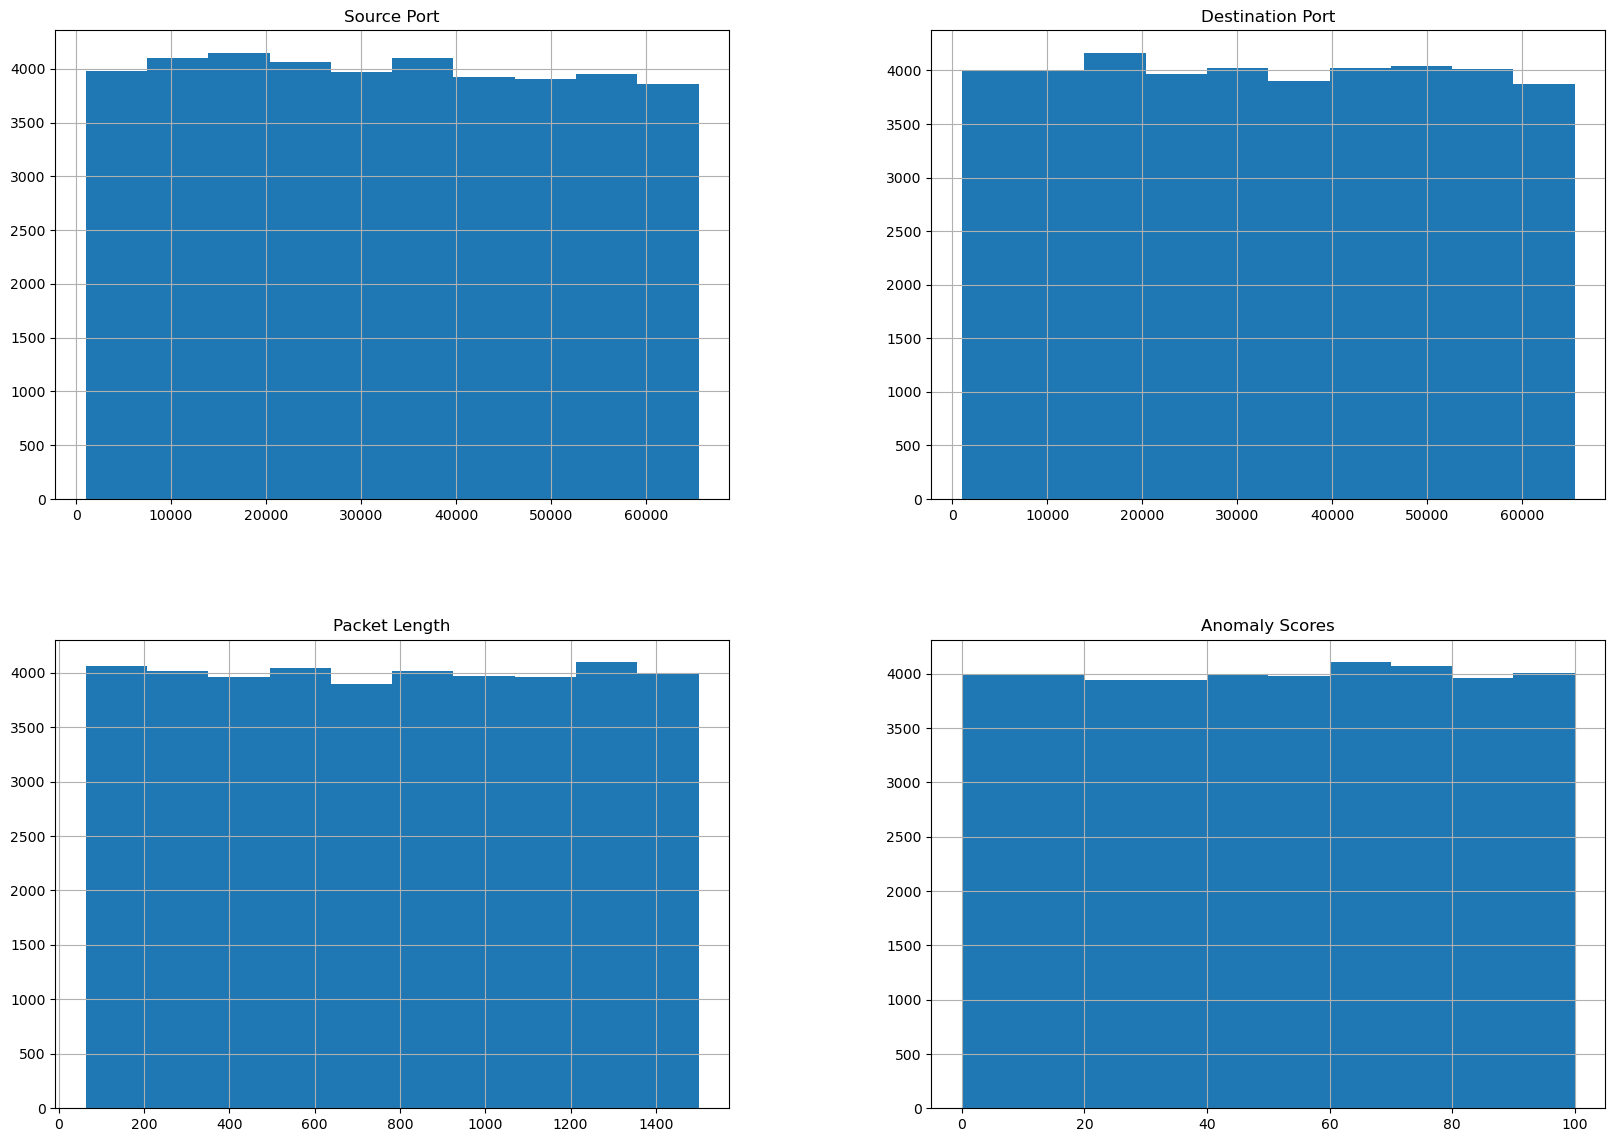

In [5]:
df.hist(figsize=(20, 14))

In [25]:
# import pandas as pd
# from user_agents import parse

 
# df['os'] = df['Device Information'].apply(lambda x: parse(x).os.family)
# df['os_version'] = df['Device Information'].apply(lambda x: parse(x).os.version_string)
# df['browser'] = df['Device Information'].apply(lambda x: parse(x).browser.family)
# df['browser_version'] = df['Device Information'].apply(lambda x: parse(x).browser.version_string)
# df['device'] = df['Device Information'].apply(lambda x:   parse(x).device.brand)
# df['device_model'] = df['Device Information'].apply(lambda x: parse(x).device.model)
# print(df[['Device Information','os','os_version','browser','browser_version','device','device_model']].head(20))
# df.to_csv(r'Project 1\cybersecurity_attacks_new.csv')

In [6]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'os', 'os_version', 'browser', 'browser_version', 'device',
       'device_model'],
      dtype='object')

## target classes

In [7]:
target = 'Attack Type'
print(df[target].value_counts())


Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


In [47]:
print(f"device unique value {df['device'].unique()}")
print(f"device model unique value {df['device_model'].unique()}")
print(f"browser unique value {df['browser'].unique()}")
print(f"OS unique value {df['os'].unique()}")
print(f"traffic type unique value {df['Traffic Type'].unique()}")
print(f"Protocol unique value {df['Protocol'].unique()}")
print(f"Attack signature unique value {df['Attack Signature'].unique()}")
print(f"Network Segment unique value {df['Network Segment'].unique()}")

device unique value [nan 'Apple' 'Generic' 'LG']
device model unique value [nan 'Mac' 'iPod' 'iPhone' 'iPad' 'Smartphone' 'Tablet' 'UG']
browser unique value ['IE' 'Firefox' 'Opera' 'Chrome' 'Safari' 'Mobile Safari' 'Firefox iOS'
 'Chrome Mobile iOS' 'Firefox Mobile']
OS unique value ['Windows' 'Mac OS X' 'Linux' 'iOS' 'Android']
traffic type unique value ['HTTP' 'DNS' 'FTP']
Protocol unique value ['ICMP' 'UDP' 'TCP']
Attack signature unique value ['Known Pattern B' 'Known Pattern A']
Network Segment unique value ['Segment A' 'Segment B' 'Segment C']


In [54]:
print(f"number of device value {df['device'].value_counts()}")
print(f"number of device model value {df['device_model'].value_counts()}")
print(f"number of browser value {df['browser'].value_counts()}")


number of device value device
Apple      11570
Generic     4686
LG            66
Name: count, dtype: int64
number of device model value device_model
Mac           5796
Smartphone    4211
iPod          2656
iPhone        1567
iPad          1551
Tablet         475
UG              66
Name: count, dtype: int64
number of browser value browser
Opera                8049
IE                   7995
Chrome               6501
Safari               5314
Firefox              4747
Mobile Safari        2656
Firefox Mobile       1620
Chrome Mobile iOS    1604
Firefox iOS          1514
Name: count, dtype: int64


In [55]:
print(f"number of OS value {df['os'].value_counts()}")
print(f"number of traffic type value {df['Traffic Type'].value_counts()}")
print(f"number of Protocol value {df['Protocol'].value_counts()}")
print(f"number of Attack signature value {df['Attack Signature'].value_counts()}")
print(f"number of Network Segment value {df['Network Segment'].value_counts()}")

number of OS value os
Windows     17953
Linux        7171
Mac OS X     5813
iOS          5774
Android      3289
Name: count, dtype: int64
number of traffic type value Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64
number of Protocol value Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64
number of Attack signature value Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64
number of Network Segment value Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64


In [44]:
df['Alerts/Warnings'] = df['Alerts/Warnings'].notna().astype(int)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].notna().astype(int)
df['Malware Indicators'] = df['Malware Indicators'].notna().astype(int)
df['Firewall Logs'] = df['Firewall Logs'].notna().astype(int)

In [60]:
#Select relevant features and target
# features = ['Protocol', 'Traffic Type' ,
#             'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
#             'Severity Level', 'IDS/IPS Alerts','Action Taken','Attack Signature','Source Port','Destination Port']

to_drop_cols = ['Timestamp','Payload Data','User Information','Device Information', 'Source Port',
             'Geo-location Data','Proxy Information','Source IP Address','Destination IP Address','Packet Lenght']
# df_cleaned= df.drop(to_drop_cols, axis=1)
# df_cleaned = df[[target,'Protocol', 'Traffic Type' ,'os','browser','Packet Type',
#                  'Alerts/Warnings','Action Taken','Severity Level','Log Source',
#                  'Anomaly Scores','Firewall Logs','IDS/IPS Alerts','Malware Indicators',
#                  'Network Segment','device_model']]



df_cleaned = df[[target, 'Protocol','Traffic Type' ,
                 'Action Taken','Severity Level',
                 'Anomaly Scores','Firewall Logs','IDS/IPS Alerts','Malware Indicators',
                 'Network Segment','device_model']]


x = df_cleaned.drop(target,axis=1)
y = df_cleaned[target]
print(x)

      Protocol Traffic Type Action Taken Severity Level  Anomaly Scores  \
0         ICMP         HTTP       Logged            Low           28.67   
1         ICMP         HTTP      Blocked            Low           51.50   
2          UDP         HTTP      Ignored            Low           87.42   
3          UDP         HTTP      Blocked         Medium           15.79   
4          TCP          DNS      Blocked            Low            0.52   
...        ...          ...          ...            ...             ...   
39995      UDP         HTTP       Logged         Medium           39.28   
39996      UDP         HTTP       Logged           High           27.25   
39997      UDP          DNS      Blocked            Low           31.01   
39998      UDP          FTP      Ignored            Low           97.85   
39999     ICMP         HTTP       Logged         Medium           34.63   

       Firewall Logs  IDS/IPS Alerts  Malware Indicators Network Segment  \
0                  1   

In [61]:
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=['int', 'float']).columns
print("Categorical Features:", categorical_cols)
print("Numerical Features:", numerical_cols)

Categorical Features: Index(['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level',
       'Network Segment', 'device_model'],
      dtype='object')
Numerical Features: Index(['Anomaly Scores', 'Firewall Logs', 'IDS/IPS Alerts',
       'Malware Indicators'],
      dtype='object')


# Plot each class with variable 

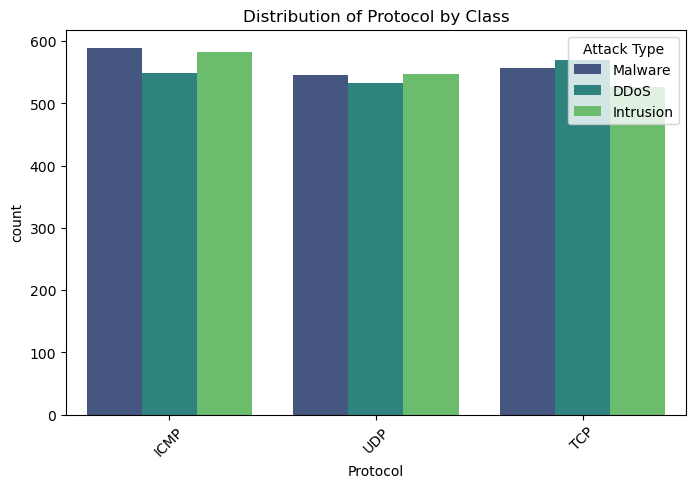

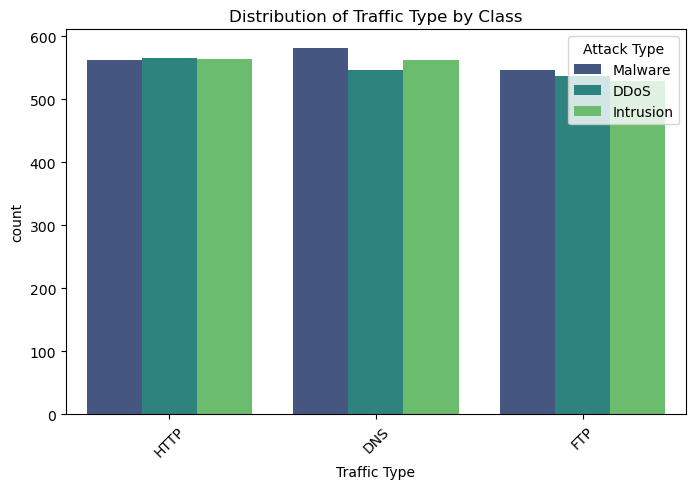

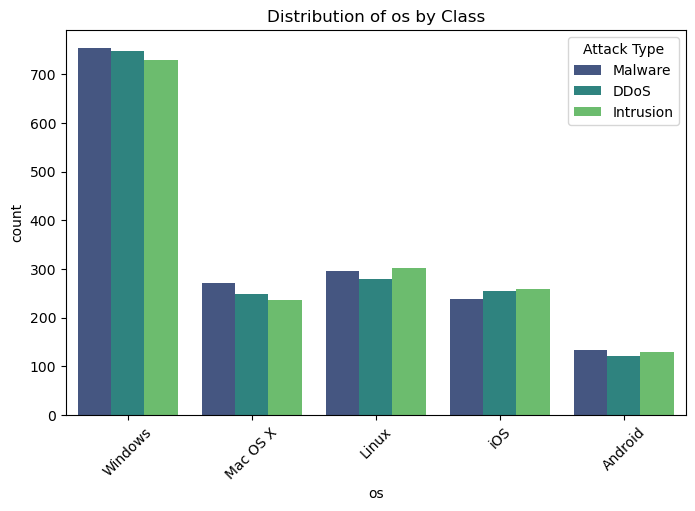

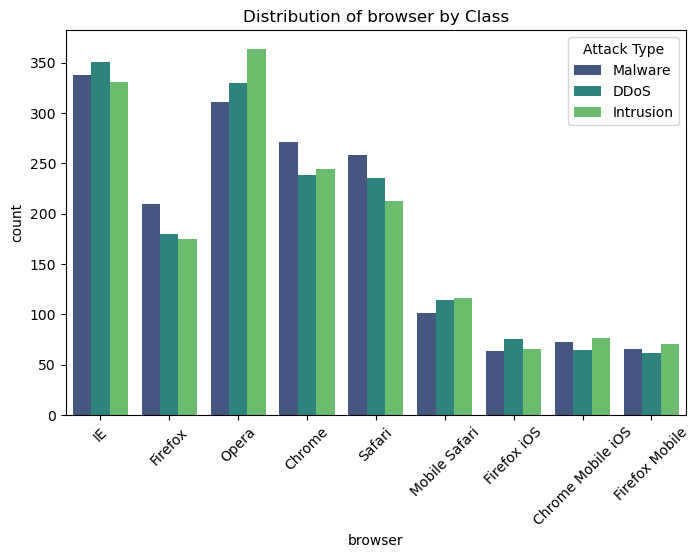

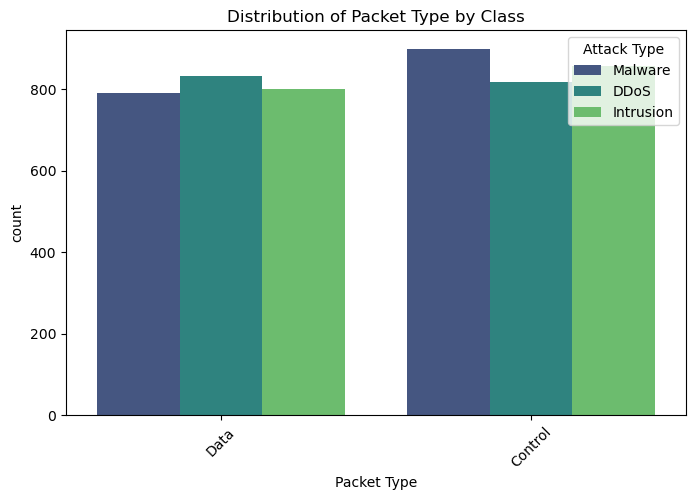

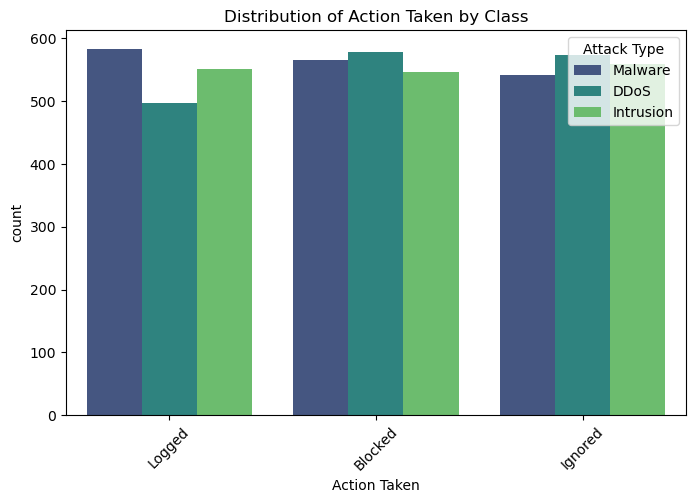

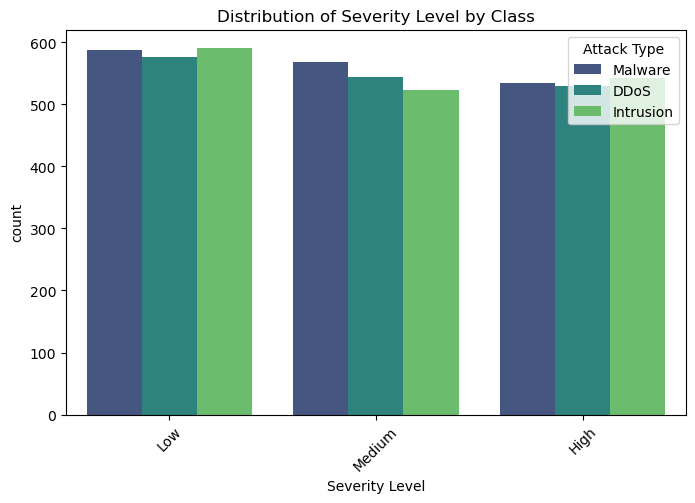

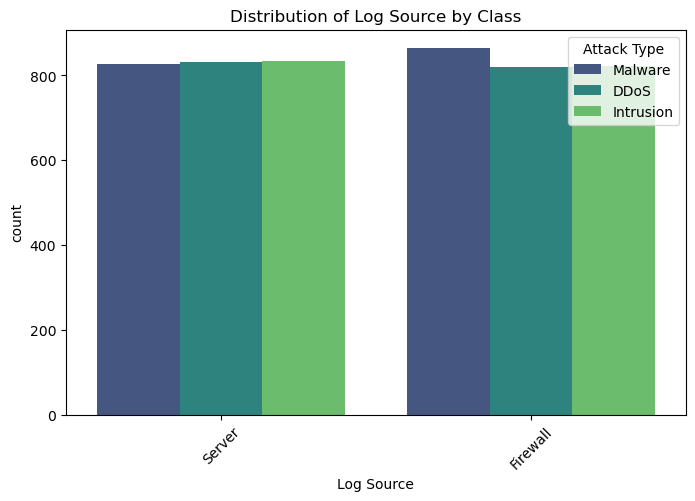

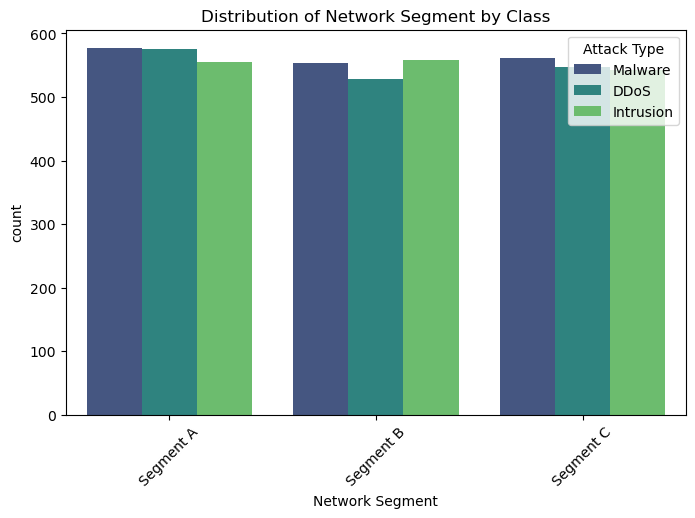

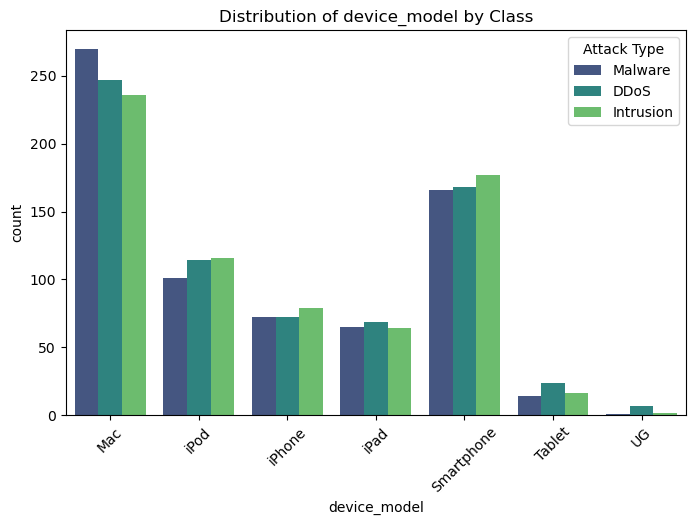

In [117]:
for feature in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_cleaned[:5000], x=feature, hue=target, palette="viridis")
    plt.title(f"Distribution of {feature} by Class")
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()

# pipleline

In [64]:
from sklearn.tree import DecisionTreeClassifier
def build_pipeline(x):
    categorical_cols = x.select_dtypes(include=['object']).columns
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'  # Keep numerical columns as they are
    )
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        # ('classifier', RandomForestClassifier(n_estimators=0, random_state=42))
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])
    
    return pipeline

def train_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
    
    pipeline = build_pipeline(x)
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    # acc = accuracy_score(y_test, y_pred)
    # print(f'Accuracy: {acc:.4f}')
    # print(classification_report(y_test, y_pred))


    y_pred_train = pipeline.predict(x_train)
    print("Accuracy Score on training set:", accuracy_score(y_train, y_pred_train))
    print("Accuracy Score on testing set:", accuracy_score(y_test, y_pred))
    
    return pipeline

In [65]:
pipline1 = train_model(x,y)

Accuracy Score on training set: 0.99965625
Accuracy Score on testing set: 0.3305


## ex1

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)
# Temporary preprocessing for RFE
X_train_processed = preprocessor.fit_transform(x_train)
selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=10)
selector.fit(X_train_processed, y_train)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=10)

In [58]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = preprocessor.get_feature_names_out()[selected_feature_indices]

print("Selected features:", selected_feature_names)

Selected features: ['num__Anomaly Scores' 'num__Firewall Logs' 'num__IDS/IPS Alerts'
 'num__Malware Indicators' 'cat__Protocol_ICMP' 'cat__Traffic Type_FTP'
 'cat__Traffic Type_HTTP' 'cat__Action Taken_Logged'
 'cat__Severity Level_High' 'cat__Network Segment_Segment C']


In [51]:
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10)
selector.fit(X_train_processed, y_train)

# Get selected feature indices
selected_indices = selector.support_

# Retrieve feature names after preprocessing
preprocessor_feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Ensure the length of selected_indices matches the length of preprocessor_feature_names
assert len(selected_indices) == len(preprocessor_feature_names), "Mismatch in feature lengths"

# Get the selected feature names
selected_features = [preprocessor_feature_names[i] for i in range(len(preprocessor_feature_names)) if selected_indices[i]]
print("Selected Features by RFE:", selected_features)

ValueError: operands could not be broadcast together with shapes (5,) (41,) 

In [50]:

selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10)
selector.fit(X_train_processed, y_train)
# Get selected feature indices
selected_indices = selector.support_

# Map back to original feature names
# First, retrieve feature names after preprocessing
preprocessor_feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Get the selected feature names
selected_features = [preprocessor_feature_names[i] for i in range(len(preprocessor_feature_names)) if selected_indices[i]]
print("Selected Features by RFE:", selected_features)

ValueError: operands could not be broadcast together with shapes (5,) (41,) 

In [30]:
def filter_features(X):
    return X[:, selector.support_]

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', FunctionTransformer(filter_features)),  # Keep RFE-selected features
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])

In [31]:


model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

y_pred_train = model.predict(X_train)
print("Accuracy Score on training set:", accuracy_score(y_train, y_pred_train))
print("Accuracy Score on testing set:", accuracy_score(y_test, y_pred))

Accuracy Score on training set: 0.34709375
Accuracy Score on testing set: 0.344125
